In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from matplotlib import font_manager, rc            # 그래프의 한글 폰트 해결
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
import matplotlib as mpl                           # 그래프의 마이너스 부호 해결
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df_t = pd.read_csv(r'C:\Users\zzhwa\Downloads\corona\coronavirusdataset_20200601/_SeoulFloating.csv')

df_t.tail()

,date,hour,birth_year,sex,province,city,fp_num
1084795,2020-05-31,21,40,female,Seoul,Dobong-gu,27620
1084796,2020-05-31,21,40,female,Seoul,Songpa-gu,56560
1084797,2020-05-31,21,50,female,Seoul,Gangdong-gu,38960
1084798,2020-05-31,22,60,female,Seoul,Guro-gu,25420
1084799,2020-05-31,23,40,male,Seoul,Eunpyeong-gu,38650


In [6]:
#서울 전체 연령 유동인구 수 변화 추이
#1.날짜별 유동인구 수 전체 합 구하기

all_flot_df = df_t.groupby(['date'])['fp_num'].sum()
all_flot_df.idxmax()                          #컬럼이 최대인 행의 값을 알려줌 => '2020-02-23'
all_flot_df['2020-02-23']                     #컬럼의 값을 알아봄.

all_df =  pd.DataFrame(all_flot_df)           #all_flot_df를 데이터프레임으로 만듦.
all_df.columns = ['전체유동인구']             #컬럼명을 '전체유동인구'로 변환해 줌.



# #최대값 지우기 날짜를 알기 때문에 행의 인덱스 명으로 행 삭제 하기
all_df2 = all_df.drop(['2020-02-23'])
all_df2.max()                                 #최대값 확인을 통해 최대치가 지워졌음을 알 수 있습니다.

전체유동인구    204352220
dtype: int64

In [7]:
#정규화 하기
normalization_all_df = (all_df - all_df.mean())/all_df.std()
print(normalization_all_df.head())

#최대치 지운 값으로 정규화 하기
normalization_all_df2 = (all_df2 - all_df2.mean())/all_df2.std()
print(normalization_all_df2.head())


              전체유동인구
date                
2020-01-01 -0.280433
2020-01-02  0.356661
2020-01-03  0.381349
2020-01-04  0.021663
2020-01-05 -0.078133
              전체유동인구
date                
2020-01-01 -0.428097
2020-01-02  0.874516
2020-01-03  0.924994
2020-01-04  0.189575
2020-01-05 -0.014470


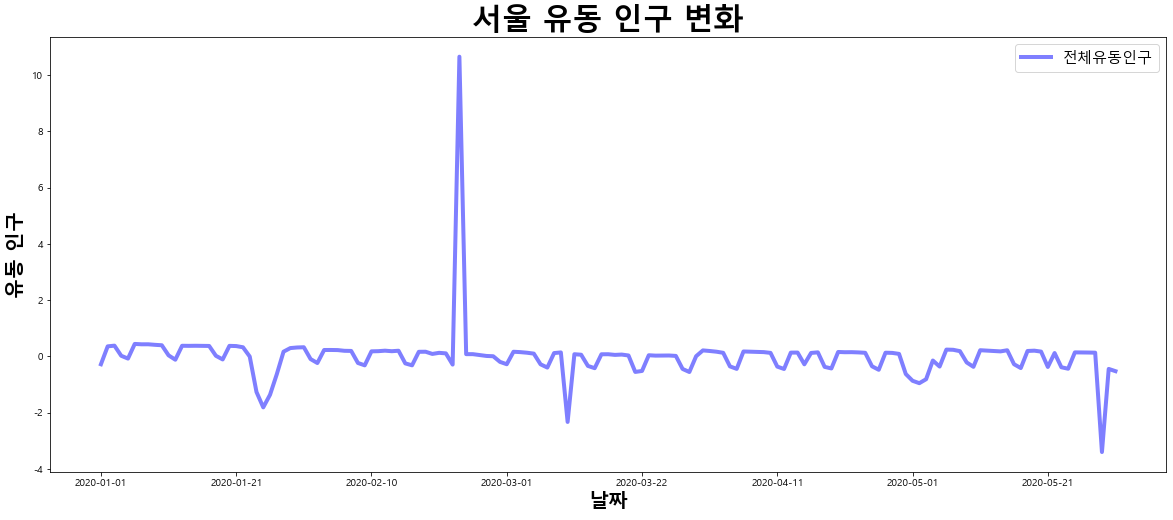

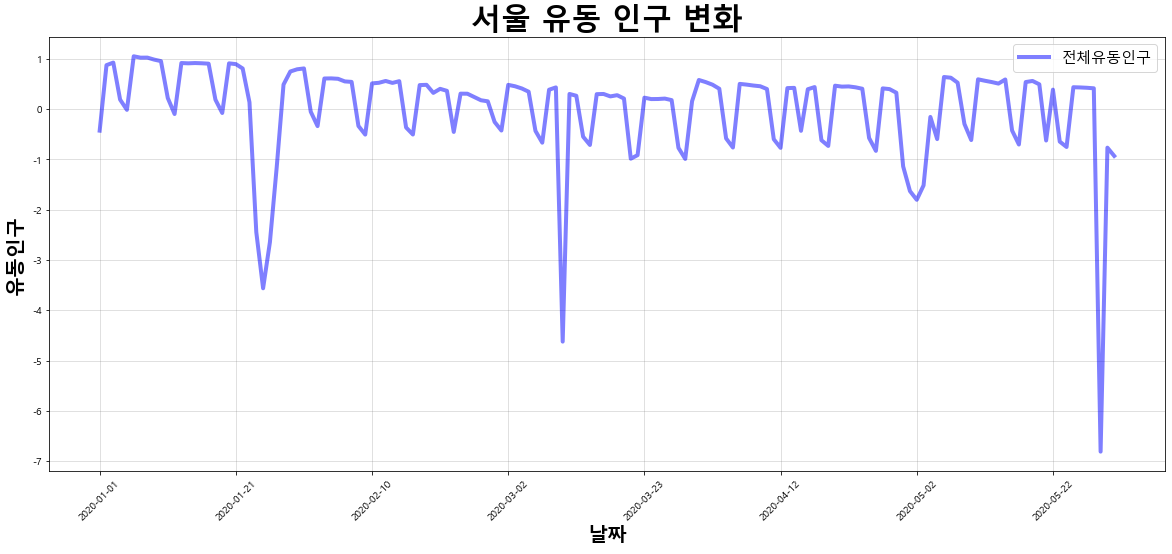

In [15]:
#그래프 작성하기 _이쁘지 않은 데이터 생성 최대값을 지워보자
normalization_all_df.plot(color='blue', alpha=0.5, linewidth=4, figsize=(20, 8))
plt.xlabel("날짜", fontsize = 20, fontweight = "bold")
plt.ylabel("유동 인구", fontsize = 20, fontweight = "bold")
plt.title("서울 유동 인구 변화", fontsize = 30, fontweight = "bold")
plt.legend(loc=0, fontsize = 15)                             # 범주 위치를 조정할 수 있다.
plt.show()


#최대값을 지운 그래프
normalization_all_df2.plot(color='blue', alpha=0.5, linewidth=4, figsize=(20, 8))
plt.xlabel("날짜", fontsize = 20, fontweight = "bold" )
plt.ylabel("유동인구", fontsize = 20, fontweight = "bold")
plt.title("서울 유동 인구 변화", fontsize = 30, fontweight = "bold")
plt.legend(loc=0, fontsize = 15)                             # 범주 위치를 조정할 수 있다.
plt.xticks(rotation= 45)
plt.grid(alpha=0.3, color='grey')
plt.show()